In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-stock-price/zomato.csv


In [2]:
train=pd.read_csv("/kaggle/input/zomato-stock-price/zomato.csv")
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [3]:
x=train[['Open','High','Low','Volume']]
y=train['Close']

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


In [5]:
print(len(train))

631


In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 0)

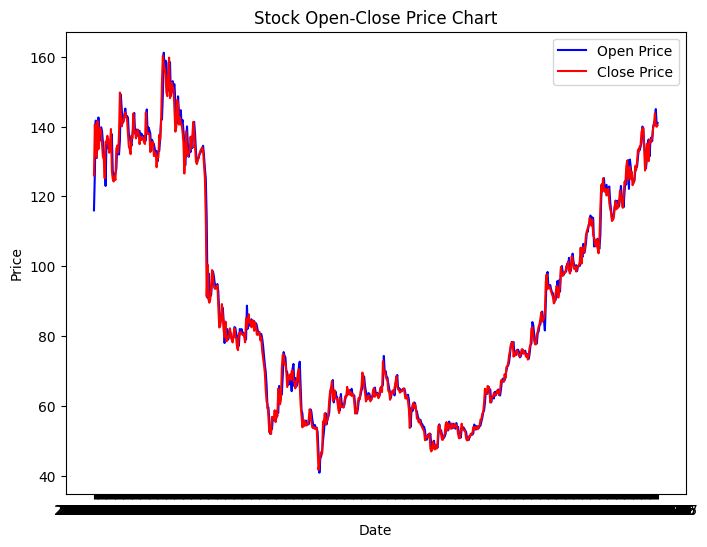

In [7]:
# Before Normalization: 
plt.figure(figsize=(8, 6))
plt.plot(train['Date'], train['Open'], label='Open Price', color='blue')
plt.plot(train['Date'], train['Close'], label='Close Price', color='red')
plt.title('Stock Open-Close Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix , accuracy_score
model = LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
print(model.coef_)

[-5.01851352e-01  7.45342929e-01  7.58445394e-01 -5.27122013e-10]


In [11]:
print(model.intercept_)

-0.22073613956887073


In [12]:
predicted=model.predict(x_test)

In [13]:
print(x_test)

           Open        High         Low    Volume
391   50.799999   51.799999   50.450001  48841966
439   63.450001   64.949997   63.150002  65082316
311   62.900002   62.950001   62.049999   7775480
249   53.750000   54.000000   52.900002  27302087
481   75.449997   77.250000   74.550003  49243205
..          ...         ...         ...       ...
132   95.750000   99.750000   94.800003  18674088
581  114.900002  116.900002  113.500000  61963724
541   99.900002  101.199997   98.500000  34894254
97   144.699997  144.949997  140.000000  19474412
611  134.250000  136.149994  132.250000  29917881

[158 rows x 4 columns]


In [14]:
newdf=pd.DataFrame({'Actual':y_test,'Predicted Price':predicted})

In [15]:
print(newdf)

         Actual  Predicted Price
391   51.400002        51.131804
439   63.549999        64.208338
311   62.349998        62.189588
249   53.650002        53.160643
481   75.650002        76.008471
..          ...              ...
132   98.900002        97.965736
581  113.800003       115.298022
541  100.099998        99.761493
97   140.649994       141.370920
611  134.649994       134.172788

[158 rows x 2 columns]


In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 391 to 611
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actual           158 non-null    float64
 1   Predicted Price  158 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [17]:
from sklearn.metrics import confusion_matrix , accuracy_score
model.score(x_test,y_test)

0.9985348308766752

In [18]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.7493677618269309


<Axes: ylabel='Density'>

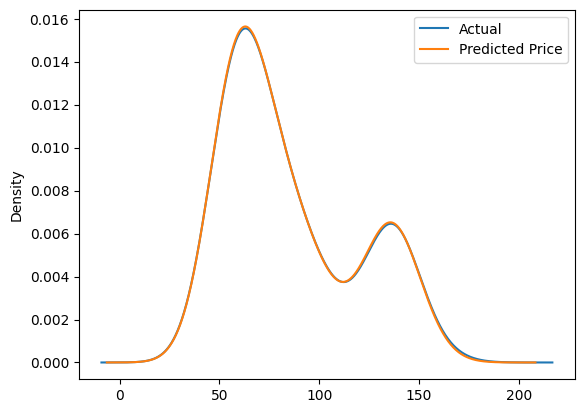

In [19]:
graph=newdf.head(100)
graph.plot(kind='kde')

So this is the Actual vs Predicted Price of zomato share price